In this project we will predict the car price using linear regression, but we are going to give it more analysis in order to understan each step that we are making

We are using a CSV file, this means that our data is separated by comas(,). As we can see the data is divided in rows. There are a lot of columns that represents the characteristics of the car, even the price (the final row). Lets understand each characteristic.
* **Symbolinng **  = risk of the car, +3 risky car, -3 less risky car
* **Normalize loses** = average loss payment por per insured [65, 256]
* .......... the other characteristics are quite easy to understad............
* **price** = this is our target, the value of the car

To create our predictive model we need some libraries, complements in python that help us a lot with functions already made



In [0]:
# The first library is pandas, a power library for data manipulation (data structure)
import pandas as pd

In [0]:
# Then we have numpy, this library is used to work with arrays and matrices
import numpy as np

In [0]:
# Also we will use scipy, because it has mathematical functions, integral, differential ecuations, optimization, etc.
import scipy as sp

In [0]:
# We need to graph our data too, so we can make plots with matplotlib
import matplotlib as plt
from matplotlib import pyplot

In [0]:
# This library has more interesting tools, viloin graphs, timeseries, heatmaps
import seaborn as sns

In [0]:
# Scikit learn is a library with various machine learning algorithms predisgned 
import sklearn

In [0]:
# Stats model is a library with various statistics algorithms predisgned 
import statsmodels as sm

Now that we have al the libraries that we need, we can read the dataset. But there 2 aspect to have in consideer:
* the format of the file (csv, json, xlsx, hdt) 
* the path of the file (in our pc or online storage)

For our case, the  [dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data) is online

In [0]:
# Lets read the dataset
# also the data set doen't have headers, so we have to tell this to our reader

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
data = pd.read_csv(url, header = None)

So what happened if the data was on json or another format, here are the most used:

Format file | Read | Save
--- | --- | --
csv | pd.read_csv() | .to_csv()
json | pd.read_json() | .to_json()
xls | pd.read_excel() | .to_excel()
sql | pd.read_sql()|  .to_sql()

In [139]:
# we can have a look of the first 5 rows 
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


So, the headers are just numbers (0:25). How can we know what variable each represent, fortunately the header is on other file


In [140]:
# Adding the headers, we can see that them are separeted (https://archive.ics.uci.edu/ml/datasets/Automobile)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
data.columns = headers
# No we can better understand the data
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [142]:
# What if we want to storaged our worked data in our pc in a CSV file, well this is the method
# Note1: this is the path in my windows pc
path  = "C:\Users\gian\my_datasets\cars.csv"
# Note2: we have to specify the name of the file at the end of the path
data.to_csv(path)


SyntaxError: ignored

In [143]:
# What type of data is each column
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [144]:
# Brief statistics of the data
data.describe()
# If we call the function like above, it doesn't show us all the variables

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [145]:
# So we call the parameter include
data.describe(include = "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


As we can see there a lot of NaN(Non numeric Value) values. This is because our data is not "clean" yet, we will work in that. This process is called "data cleaning o data pre processing and we will cover this:
* Identify and handle missing values
* Data formating
* Data Normalization (centering/scaling)
* Data Bining 
* Turning categorical values to numerical values

1.  **Identifying missing values**  \
We can drow the row with the missing value(not recomendable) o replace the value (yes)\
* droping the row: \
\
data.dropna(subset=["price"], axis=0, inplace = True)\
\
This line of code drops NaN values in the column price, axis = 0 means that we are just going to drop one row (we have to specify it), inplace= True returns the dataset with the row dropped

* Handle missing values:\
We will use the mean of the whole column to replace the value\
\
mean = data["normalized-losses"].mean\
\
data["normalized-losses"].replace(np.nan, mean)

2.  **Data formating**  \
This technique is used to formate the data in the same comprensible values. I.E. Some times we find N.Y. as reference to New York, so we must use one of them\
The column city-mpg is in miles per gallon, and we are more familiar with kilometeers, so ...\
\
data["city-mpg"] = 235/data["city-mpg"]\
\
Also we have to change the name of the column\
\
data.rename(columns ={"city-mpg":"city-L/100km"}, inplace = True)

2.  **Data Normalization**  \
Some variables have differente ranges, some of them are 2 digit values anothers 3 or 4 digits, this could be a problem, sor in order to fix that we normalize values with 3 techniques:
* Simple featuring scaling:\
\
 $X new = \frac{X old}{X max} $\
 we replace all values dividing each value by the max value\

* Simple featuring scaling:\
 $X new = \frac{X old - Xmin}{X max - X min} $\
 We replace all values substracting the minvalue and dividing each value by the range\
* Z-Score:\
 $X new = \frac{X old - μ}{σ} $\
We replace each value by substracting the their media and dividing it by their standar desviation\

2.  **Data Binning**  \
We can bin the data in ranges, I.E. prices>40,000: high ; prices>=15,000 : medium and prices < 15,000 : low\
\
bins = np.linspace(min(data["price"]), max(data["price"]),4\
\
This line of code made 4 bins, based in the min price and the max price.Also we need the name for our bins\
\
group_names = ["low","medium","high"]\
\
data["price-binned"] = pd.cut(data["price"],bins, labels = grop_names, include_lowest = True)\
We have cut it our data acoording the bins we found, and labeled based in our list\

2.  **Turning categorical values to numerical values**  \
Well, we cannot work properly with string values, so we have to turn it in numerical values\
As an example, lets take the column fuel, their values are gas or diesel, we can make it easir if we assign a value of 1 or 0 if it is gas, this is called dummy variable

Car | fuel | --> | gas | diesel
--- | --- | -- | -- | -- 
A | gas | ... | 1 | 0
B | diesel | ... | 0| 1
C | gas | ... | 1 | 0
D | gas | ... | 1 | 0

We can do that in one line of code\
\
pd.get_dummies[data("fuel")]\
\
This line of code
automatically generates the dummy variables for us\
Now that we know what to use, we can proceed to pre process our data





In [146]:
# There are some "?" values, so let's replace them with NaN
data.replace("?", np.nan, inplace = True)
data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Yes, we have replaced them, compare cell 11 with cell 16. Can you see it?

In [147]:
# Now we have to find all the null values
missing_data = data.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Null values are shown as True

In [148]:
# A brief look of how many null values do we have in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Well, there are quite few new values in each column
* "normalized-losses": 41 missing data
* "stroke" : 4 missing data
* "horsepower": 2 missing data
* "bore": 4 missing data
* "peak-rpm": 2 missing data
* "num-of-doors": 2 missing data
* "price": 4 missing data

How we should threat them? That's right, replacing them, but What technique? Well we are free to choose (not always you would be to do that), so let's use all of them\

In the first 5 we are going to use "replace by mean"\
The next one "replace bt frequency"\
The last one "drop the row"

In [0]:
# Using replace by mean for "normalized-losses","stroke","horsepower" and "bore"  
avg_norm_loss = data["normalized-losses"].astype("float").mean(axis=0)
data["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

avg_stroke = data["stroke"].astype("float").mean(axis=0)
data["stroke"].replace(np.nan, avg_stroke, inplace=True)

avg_hp = data["horsepower"].astype("float").mean(axis=0)
data["horsepower"].replace(np.nan, avg_hp, inplace=True)

avg_bore = data["bore"].astype("float").mean(axis=0)
data["bore"].replace(np.nan, avg_bore, inplace=True)

avg_peak = data["peak-rpm"].astype("float").mean(axis=0)
data["peak-rpm"].replace(np.nan, avg_peak, inplace=True)

In [0]:
# Using replace by frequency for 'num-of-doors'
# First  What are the values?
data['num-of-doors'].value_counts()
# What is the most common value?
data['num-of-doors'].value_counts().idxmax()
# Now we replace the missing values with the most common value (4)
data["num-of-doors"].replace(np.nan, "four", inplace=True)

In [0]:
# Finally for the price drop NaN values
data.dropna(subset=["price"], axis=0, inplace=True)
# And reset the data, because we have dropped values
data.reset_index(drop=True, inplace=True)

In [152]:
# Now let's look again our data
missing_data = data.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [153]:
# Count again if we have missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    201
Name: symboling, dtype: int64

normalized-losses
False    201
Name: normalized-losses, dtype: int64

make
False    201
Name: make, dtype: int64

fuel-type
False    201
Name: fuel-type, dtype: int64

aspiration
False    201
Name: aspiration, dtype: int64

num-of-doors
False    201
Name: num-of-doors, dtype: int64

body-style
False    201
Name: body-style, dtype: int64

drive-wheels
False    201
Name: drive-wheels, dtype: int64

engine-location
False    201
Name: engine-location, dtype: int64

wheel-base
False    201
Name: wheel-base, dtype: int64

length
False    201
Name: length, dtype: int64

width
False    201
Name: width, dtype: int64

height
False    201
Name: height, dtype: int64

curb-weight
False    201
Name: curb-weight, dtype: int64

engine-type
False    201
Name: engine-type, dtype: int64

num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64

engine-size
False    201
Name: engine-size, dtype: int64

fuel-system
False    201
Name: fuel-syst

We don't have missing values. Hurray!\
But we have another inconvinient, the type of data, we can only work properly with integers, so lets check 

In [154]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [0]:
# Converting the data into numeric values type (note that there are variables that we can't change, like make)
data[["bore", "stroke"]] = data[["bore", "stroke"]].astype("float")
data[["normalized-losses"]] = data[["normalized-losses"]].astype("int")
data[["horsepower"]] = data[["horsepower"]].astype("int")
data[["price"]] = data[["price"]].astype("float")
data[["peak-rpm"]] = data[["peak-rpm"]].astype("float")

In [156]:
# Let's check our data again
data.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Now we have another task to do, we have to standarize(format) our data

In [157]:
# Let's change the miles per galon to liters per 100 kilometeers
data['city-mpg'] = 235/data["city-mpg"]
data.rename(columns={"city-mpg":'city-L/100km'}, inplace = True)
# Also we have to change highway-mpg too
data["highway-mpg"]=235/data["highway-mpg"]
data.rename(columns={"highway-mpg":'highway-L/100km'}, inplace=True)
# A brief look of what we did
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0


In [158]:
# Normalicing values into [0, 1] range
data['length'] = data['length']/data['length'].max()
data['width'] = data['width']/data['width'].max()
data['height'] = data['height']/data['height'].max()
# A brief look of what we did
data[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


In [159]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0


Text(0, 0.5, 'count')

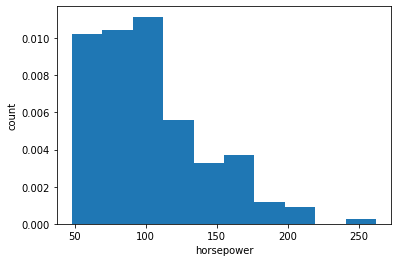

In [160]:
# We are almost done, we have Binning the data (create groups inside the data)
# Let's start with hourse-power, firsta a look of our data
x = data["horsepower"]
plt.pyplot.hist(x, density=True)
# name our axis
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")

In [161]:
# We would like 3 bins, so we need 4 dividers
bins_hp = np.linspace(min(data["horsepower"]), max(data["horsepower"]), 4)
bins_hp

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [0]:
# Setting the name of the labels for the 
hp_labels = ['Low', 'Medium', 'High']

In [163]:
# Binning the horse power
data['horsepower-binned'] = pd.cut(data['horsepower'], bins_hp, labels=hp_labels, include_lowest=True )
data[['horsepower','horsepower-binned']].head(5)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low


In [164]:
# How many items for each label do we have?
data["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0, 0.5, 'count')

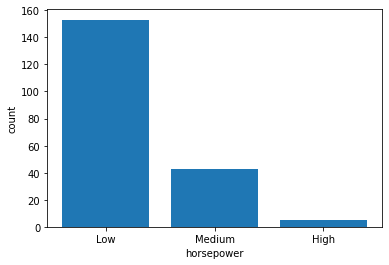

In [165]:
# Let's plot each label it in bars
pyplot.bar(hp_labels, data["horsepower-binned"].value_counts())
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")

In [166]:
# At least we have will use dummy variables for "Fuel-Type" assigning 0 for gas and 1 for diesel
dummy_variable_1 = pd.get_dummies(data["fuel-type"])
# A look of our dummy variables
dummy_variable_1.head(5)


,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [167]:
# Inserting our dummy variables in the dataset
data = pd.concat([data, dummy_variable_1], axis=1)
# Droping "fuel type" because we have it in 2 separate columns
data.drop("fuel-type", axis = 1, inplace=True)
# How it looks
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0,Low,0,1


(array([8.20895522, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.79104478]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

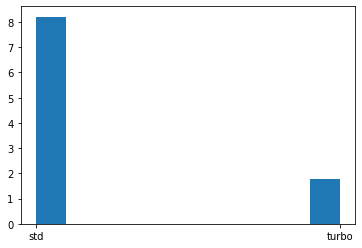

In [168]:
# We can do the same for "aspiration" 
x1 = data["aspiration"]
plt.pyplot.hist(x1, density=True)

In [169]:
# Finding the values in aspiration
data["aspiration"].value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

In [170]:
# Setting the dummy values
dummy_variable_2 = pd.get_dummies(data["aspiration"])
dummy_variable_2.head(5)

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [171]:
# Inserting our dummy variables in the dataset
data = pd.concat([data, dummy_variable_2], axis=1)
# Droping "fuel type" because we have it in 2 separate columns
data.drop("aspiration", axis = 1, inplace=True)
# How it looks
data.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,diesel,gas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0,Low,0,1,1,0


At this point we cover the process of cleaning the data to process it in our model, but wich one?\
 So we have to understand the data properly, in order to do that we use statistics\
 The most used methods used for that:\
 * .describe() : it show us basic statistics of the dataset
 * .valuecounts(): count the the humber of repetitions of a data
 * 

We will use a powerful graph called boxplot to understand our data
 ![We will use a powerful graph called boxplot](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-2.png)
This type of graph has line inside the box, that represents the mean. One value up the box that represent the represent the third quartile. One value up the limit of the box that represent the represent the third quartile. One value down the limit of thebox that represents the first(25%) quartile